In [5]:
import pandas as pd

df = pd.read_csv("augmented_squadv2.csv")
len(df)

574211

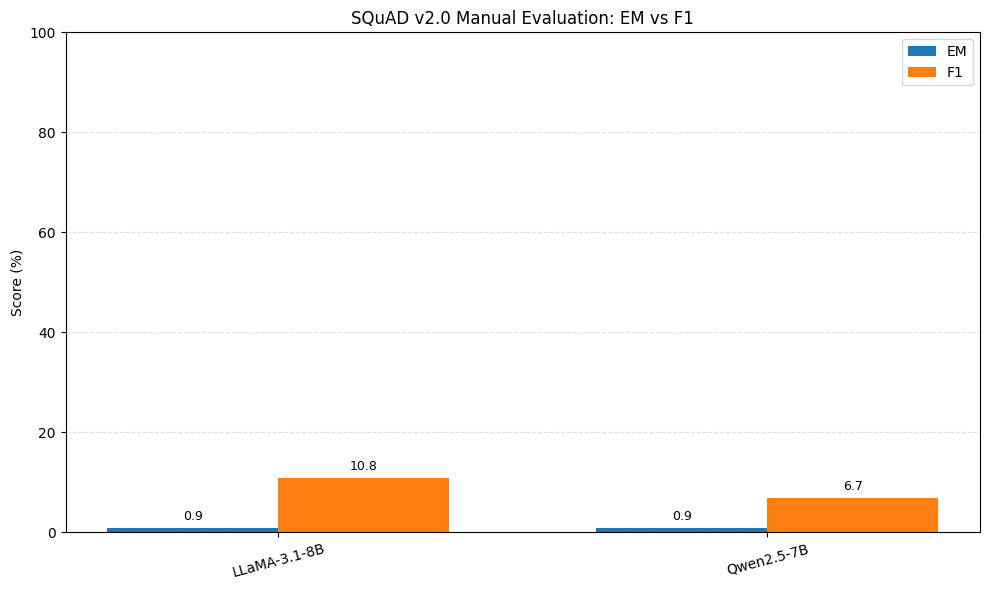

In [6]:
import os, json, re, string
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

results_dir = "results"
files = {
    "Qwen2.5-7B": "predictions_techqa_llama.jsonl",
    "LLaMA-3.1-8B": "predictions_techqa_qwen.jsonl"
}
csv_out = "squadv2_metrics_em_f1.csv"

def normalize_answer(s: str) -> str:
    if s is None:
        return ""
    s = s.lower()
    exclude = set(string.punctuation)
    s = "".join(ch for ch in s if ch not in exclude)
    s = re.sub(r"\b(a|an|the)\b", " ", s)
    s = " ".join(s.split())
    return s

def f1_score(prediction: str, ground_truth: str) -> float:
    pred = normalize_answer(prediction).split()
    gold = normalize_answer(ground_truth).split()
    if len(gold) == 0 and len(pred) == 0:
        return 1.0
    if len(gold) == 0 or len(pred) == 0:
        return 0.0
    common = defaultdict(int)
    for t in gold:
        common[t] += 1
    num_same = 0
    for t in pred:
        if common[t] > 0:
            num_same += 1
            common[t] -= 1
    if num_same == 0:
        return 0.0
    precision = num_same / len(pred)
    recall = num_same / len(gold)
    return 2 * precision * recall / (precision + recall)

def exact_match_score(prediction: str, ground_truth: str) -> int:
    return int(normalize_answer(prediction) == normalize_answer(ground_truth))

def read_jsonl(path):
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip():
                yield json.loads(line)

def evaluate_file(jsonl_path: str):
    total = 0
    em_sum = 0
    f1_sum = 0.0
    for ex in read_jsonl(jsonl_path):
        pred = ex.get("predicted_answer", "")
        gold = ex.get("gold_answer", "")
        em_sum += exact_match_score(pred, gold)
        f1_sum += f1_score(pred, gold)
        total += 1
    if total == 0:
        return {"exact": 0.0, "f1": 0.0, "total": 0}
    return {
        "exact": 100.0 * em_sum / total,
        "f1": 100.0 * (f1_sum / total),
        "total": total
    }

rows = []
for model, fname in files.items():
    path = os.path.join(results_dir, fname)
    if os.path.exists(path):
        res = evaluate_file(path)
        rows.append({"model": model, "EM": res["exact"], "F1": res["f1"], "total": res["total"]})
    else:
        rows.append({"model": model, "EM": None, "F1": None, "total": 0})

df = pd.DataFrame(rows)

plot_df = df.dropna(subset=["EM", "F1"]).copy()

# Sort by F1 desc for nicer comparison
if len(plot_df) > 0:
    plot_df = plot_df.sort_values(by="F1", ascending=False)

df.to_csv(csv_out, index=False)

plt.figure(figsize=(10, 6))

if len(plot_df) > 0:
    models = plot_df["model"].tolist()
    x = range(len(models))
    bar_width = 0.35

    em_scores = plot_df["EM"].tolist()
    f1_scores = plot_df["F1"].tolist()

    em_bars = plt.bar([i - bar_width/2 for i in x], em_scores, width=bar_width, label="EM")
    f1_bars = plt.bar([i + bar_width/2 for i in x], f1_scores, width=bar_width, label="F1")

    plt.xticks(list(x), models, rotation=15)
    plt.ylabel("Score (%)")
    plt.ylim(0, 100)
    plt.title("SQuAD v2.0 Manual Evaluation: EM vs F1")

    # Add value labels on bars
    def autolabel(bars):
        for b in bars:
            h = b.get_height()
            plt.text(b.get_x() + b.get_width()/2, h + 1, f"{h:.1f}", ha='center', va='bottom', fontsize=9)
    autolabel(em_bars)
    autolabel(f1_bars)

    # Light horizontal grid for readability
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.legend()
else:
    plt.text(0.5, 0.5, "No evaluable models found.\n(Check file paths.)", ha="center", va="center")
    plt.axis("off")

plt.tight_layout()
plt.show()

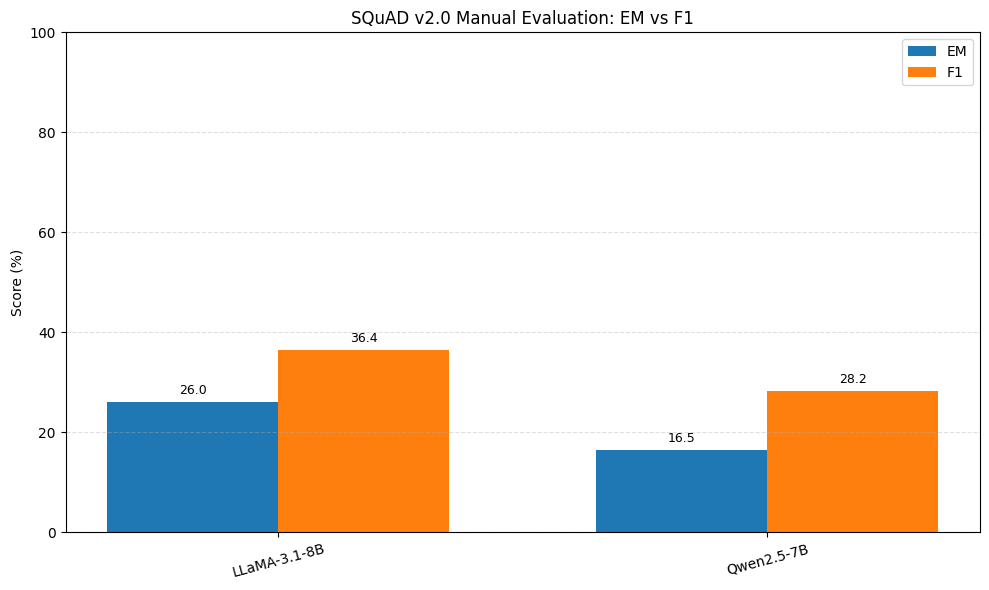

In [3]:
import os, json, re, string
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

results_dir = "results"
files = {
    "BERT": "squadv2_bert.jsonl",
    "RoBERTa": "squadv2_roberta.jsonl",
    "Qwen2.5-7B": "squadv2_qwen2.5-7B.jsonl",
    "LLaMA-3.1-8B": "squadv2_llama3.1_8B.jsonl"
}
csv_out = "squadv2_metrics_em_f1.csv"

def normalize_answer(s: str) -> str:
    if s is None:
        return ""
    s = s.lower()
    exclude = set(string.punctuation)
    s = "".join(ch for ch in s if ch not in exclude)
    s = re.sub(r"\b(a|an|the)\b", " ", s)
    s = " ".join(s.split())
    return s

def f1_score(prediction: str, ground_truth: str) -> float:
    pred = normalize_answer(prediction).split()
    gold = normalize_answer(ground_truth).split()
    if len(gold) == 0 and len(pred) == 0:
        return 1.0
    if len(gold) == 0 or len(pred) == 0:
        return 0.0
    common = defaultdict(int)
    for t in gold:
        common[t] += 1
    num_same = 0
    for t in pred:
        if common[t] > 0:
            num_same += 1
            common[t] -= 1
    if num_same == 0:
        return 0.0
    precision = num_same / len(pred)
    recall = num_same / len(gold)
    return 2 * precision * recall / (precision + recall)

def exact_match_score(prediction: str, ground_truth: str) -> int:
    return int(normalize_answer(prediction) == normalize_answer(ground_truth))

def read_jsonl(path):
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip():
                yield json.loads(line)

def evaluate_file(jsonl_path: str):
    total = 0
    em_sum = 0
    f1_sum = 0.0
    for ex in read_jsonl(jsonl_path):
        pred = ex.get("predicted_answer", "")
        gold = ex.get("gold_answer", "")
        em_sum += exact_match_score(pred, gold)
        f1_sum += f1_score(pred, gold)
        total += 1
    if total == 0:
        return {"exact": 0.0, "f1": 0.0, "total": 0}
    return {
        "exact": 100.0 * em_sum / total,
        "f1": 100.0 * (f1_sum / total),
        "total": total
    }

rows = []
for model, fname in files.items():
    path = os.path.join(results_dir, fname)
    if os.path.exists(path):
        res = evaluate_file(path)
        rows.append({"model": model, "EM": res["exact"], "F1": res["f1"], "total": res["total"]})
    else:
        rows.append({"model": model, "EM": None, "F1": None, "total": 0})

df = pd.DataFrame(rows)

plot_df = df.dropna(subset=["EM", "F1"]).copy()

# Sort by F1 desc for nicer comparison
if len(plot_df) > 0:
    plot_df = plot_df.sort_values(by="F1", ascending=False)

df.to_csv(csv_out, index=False)

plt.figure(figsize=(10, 6))

if len(plot_df) > 0:
    models = plot_df["model"].tolist()
    x = range(len(models))
    bar_width = 0.35

    em_scores = plot_df["EM"].tolist()
    f1_scores = plot_df["F1"].tolist()

    em_bars = plt.bar([i - bar_width/2 for i in x], em_scores, width=bar_width, label="EM")
    f1_bars = plt.bar([i + bar_width/2 for i in x], f1_scores, width=bar_width, label="F1")

    plt.xticks(list(x), models, rotation=15)
    plt.ylabel("Score (%)")
    plt.ylim(0, 100)
    plt.title("SQuAD v2.0 Manual Evaluation: EM vs F1")

    # Add value labels on bars
    def autolabel(bars):
        for b in bars:
            h = b.get_height()
            plt.text(b.get_x() + b.get_width()/2, h + 1, f"{h:.1f}", ha='center', va='bottom', fontsize=9)
    autolabel(em_bars)
    autolabel(f1_bars)

    # Light horizontal grid for readability
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.legend()
else:
    plt.text(0.5, 0.5, "No evaluable models found.\n(Check file paths.)", ha="center", va="center")
    plt.axis("off")

plt.tight_layout()
plt.show()

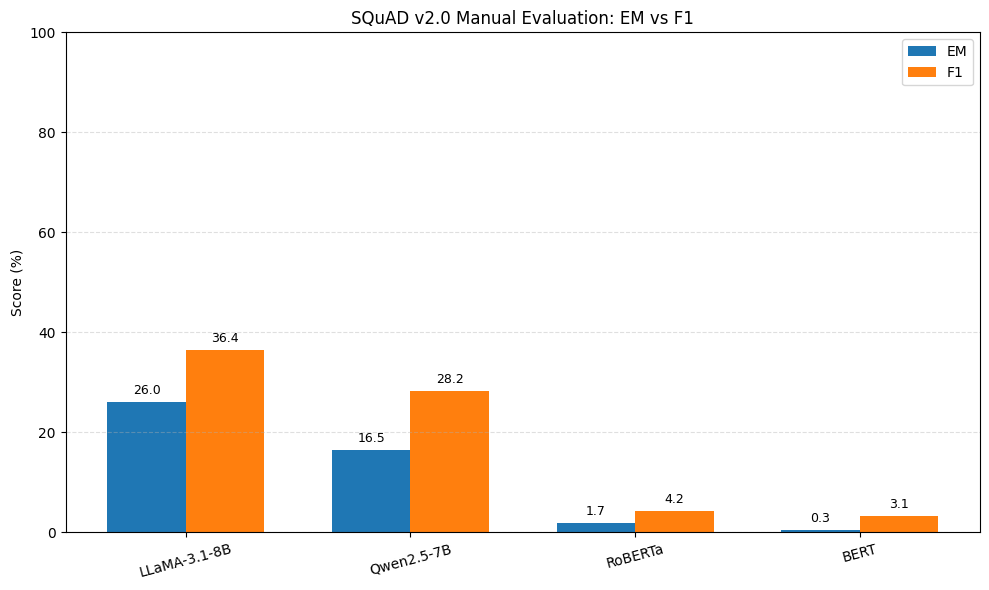

In [17]:
import os, json, re, string
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

results_dir = "results"
files = {
    "BERT": "squadv2_bert.jsonl",
    "RoBERTa": "squadv2_roberta.jsonl",
    "Qwen2.5-7B": "squadv2_qwen2.5-7B.jsonl",
    "LLaMA-3.1-8B": "squadv2_llama3.1_8B.jsonl"
}
csv_out = "squadv2_metrics_em_f1.csv"

def normalize_answer(s: str) -> str:
    if s is None:
        return ""
    s = s.lower()
    exclude = set(string.punctuation)
    s = "".join(ch for ch in s if ch not in exclude)
    s = re.sub(r"\b(a|an|the)\b", " ", s)
    s = " ".join(s.split())
    return s

def f1_score(prediction: str, ground_truth: str) -> float:
    pred = normalize_answer(prediction).split()
    gold = normalize_answer(ground_truth).split()
    if len(gold) == 0 and len(pred) == 0:
        return 1.0
    if len(gold) == 0 or len(pred) == 0:
        return 0.0
    common = defaultdict(int)
    for t in gold:
        common[t] += 1
    num_same = 0
    for t in pred:
        if common[t] > 0:
            num_same += 1
            common[t] -= 1
    if num_same == 0:
        return 0.0
    precision = num_same / len(pred)
    recall = num_same / len(gold)
    return 2 * precision * recall / (precision + recall)

def exact_match_score(prediction: str, ground_truth: str) -> int:
    return int(normalize_answer(prediction) == normalize_answer(ground_truth))

def read_jsonl(path):
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip():
                yield json.loads(line)

def evaluate_file(jsonl_path: str):
    total = 0
    em_sum = 0
    f1_sum = 0.0
    for ex in read_jsonl(jsonl_path):
        pred = ex.get("predicted_answer", "")
        gold = ex.get("gold_answer", "")
        em_sum += exact_match_score(pred, gold)
        f1_sum += f1_score(pred, gold)
        total += 1
    if total == 0:
        return {"exact": 0.0, "f1": 0.0, "total": 0}
    return {
        "exact": 100.0 * em_sum / total,
        "f1": 100.0 * (f1_sum / total),
        "total": total
    }

rows = []
for model, fname in files.items():
    path = os.path.join(results_dir, fname)
    if os.path.exists(path):
        res = evaluate_file(path)
        rows.append({"model": model, "EM": res["exact"], "F1": res["f1"], "total": res["total"]})
    else:
        rows.append({"model": model, "EM": None, "F1": None, "total": 0})

df = pd.DataFrame(rows)

plot_df = df.dropna(subset=["EM", "F1"]).copy()

# Sort by F1 desc for nicer comparison
if len(plot_df) > 0:
    plot_df = plot_df.sort_values(by="F1", ascending=False)

df.to_csv(csv_out, index=False)

plt.figure(figsize=(10, 6))

if len(plot_df) > 0:
    models = plot_df["model"].tolist()
    x = range(len(models))
    bar_width = 0.35

    em_scores = plot_df["EM"].tolist()
    f1_scores = plot_df["F1"].tolist()

    em_bars = plt.bar([i - bar_width/2 for i in x], em_scores, width=bar_width, label="EM")
    f1_bars = plt.bar([i + bar_width/2 for i in x], f1_scores, width=bar_width, label="F1")

    plt.xticks(list(x), models, rotation=15)
    plt.ylabel("Score (%)")
    plt.ylim(0, 100)
    plt.title("SQuAD v2.0 Manual Evaluation: EM vs F1")

    # Add value labels on bars
    def autolabel(bars):
        for b in bars:
            h = b.get_height()
            plt.text(b.get_x() + b.get_width()/2, h + 1, f"{h:.1f}", ha='center', va='bottom', fontsize=9)
    autolabel(em_bars)
    autolabel(f1_bars)

    # Light horizontal grid for readability
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.legend()
else:
    plt.text(0.5, 0.5, "No evaluable models found.\n(Check file paths.)", ha="center", va="center")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
from transformers import pipeline

messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]
chatbot = pipeline("text-generation", model="/export/home/cache/hub/models--mistralai--Mistral-7B-Instruct-v0.3")
chatbot(messages)


/home/brachmat/phd/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: Could not load model /export/home/cache/hub/models--mistralai--Mistral-7B-Instruct-v0.3 with any of the following classes: (<class 'transformers.models.auto.modeling_auto.AutoModelForCausalLM'>,). See the original errors:

while loading with AutoModelForCausalLM, an error is thrown:
Traceback (most recent call last):
  File "/home/brachmat/phd/.venv/lib/python3.10/site-packages/transformers/pipelines/base.py", line 293, in infer_framework_load_model
    model = model_class.from_pretrained(model, **kwargs)
  File "/home/brachmat/phd/.venv/lib/python3.10/site-packages/transformers/models/auto/auto_factory.py", line 604, in from_pretrained
    return model_class.from_pretrained(
  File "/home/brachmat/phd/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py", line 288, in _wrapper
    return func(*args, **kwargs)
  File "/home/brachmat/phd/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py", line 5027, in from_pretrained
    checkpoint_files, sharded_metadata = _get_resolved_checkpoint_files(
  File "/home/brachmat/phd/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py", line 1102, in _get_resolved_checkpoint_files
    raise OSError(
OSError: Error no file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt.index or flax_model.msgpack found in directory /export/home/cache/hub/models--mistralai--Mistral-7B-Instruct-v0.3.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/brachmat/phd/.venv/lib/python3.10/site-packages/transformers/pipelines/base.py", line 311, in infer_framework_load_model
    model = model_class.from_pretrained(model, **fp32_kwargs)
  File "/home/brachmat/phd/.venv/lib/python3.10/site-packages/transformers/models/auto/auto_factory.py", line 604, in from_pretrained
    return model_class.from_pretrained(
  File "/home/brachmat/phd/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py", line 288, in _wrapper
    return func(*args, **kwargs)
  File "/home/brachmat/phd/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py", line 5027, in from_pretrained
    checkpoint_files, sharded_metadata = _get_resolved_checkpoint_files(
  File "/home/brachmat/phd/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py", line 1102, in _get_resolved_checkpoint_files
    raise OSError(
OSError: Error no file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt.index or flax_model.msgpack found in directory /export/home/cache/hub/models--mistralai--Mistral-7B-Instruct-v0.3.




In [1]:
from bert_score import score

pred = "it is the eiffel tower"
gold = "eiffel tower"

def clean(s):
    # light normalization similar to SQuAD + drop common function words
    import re
    s = s.lower()
    s = re.sub(r'[^a-z0-9\s]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    drop = {"the","a","an","is","it","this","that","are","was","were"}
    toks = [t for t in s.split() if t not in drop]
    return " ".join(toks)

pred_c = clean(pred)
gold_c = clean(gold)

P,R,F1 = score(
    cands=[pred_c],
    refs=[gold_c],
    model_type="microsoft/deberta-xlarge-mnli",  # 
    lang="en",
    rescale_with_baseline=False                 # <<< important for short answers
)

print("Cleaned:", pred_c, "|", gold_c)
print("BERTScore F1:", float(F1.mean()))


/home/brachmat/phd/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SSLError: (MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /microsoft/deberta-xlarge-mnli/resolve/main/tokenizer_config.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1007)')))"), '(Request ID: af4af488-b2fe-4520-8897-b35cda3b0273)')

In [ ]:
# pip install sentence-transformers scipy nltk
from sentence_transformers import SentenceTransformer
from scipy.optimize import linear_sum_assignment
import numpy as np, re
import nltk
try:
    _ = nltk.corpus.stopwords.words('english')
except:
    nltk.download('stopwords')

STOP = set(nltk.corpus.stopwords.words('english')) | {"'s", "'s"}
MODEL = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def normalize(s):
    s = s.lower()
    s = re.sub(r'[^a-z0-9\s]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

def tokenize(s, drop_stop=True):
    toks = normalize(s).split()
    return [t for t in toks if (t not in STOP)] if drop_stop else toks

def soft_f1(pred, gold, tau=0.80, drop_stop=True):
    p_toks = tokenize(pred, drop_stop)
    g_toks = tokenize(gold, drop_stop)
    if not p_toks and not g_toks:
        return {"precision":1.0,"recall":1.0,"f1":1.0,"matches":[]}
    if not p_toks or not g_toks:
        return {"precision":0.0,"recall":0.0,"f1":0.0,"matches":[]}

    # embeddings
    p_emb = MODEL.encode(p_toks, normalize_embeddings=True)
    g_emb = MODEL.encode(g_toks, normalize_embeddings=True)

    # similarity matrix (gold x pred)
    S = np.matmul(g_emb, p_emb.T)  # cosine since normalized

    # threshold: disallow matches below tau
    cost = 1 - S
    cost[S < tau] = 1e6  # large cost = forbidden

    # Hungarian alignment (minimize cost == maximize similarity)
    gi, pj = linear_sum_assignment(cost)
    valid = S[gi, pj] >= tau
    m = int(valid.sum())

    precision = m / len(p_toks)
    recall    = m / len(g_toks)
    f1 = 0.0 if precision+recall==0 else 2*precision*recall/(precision+recall)

    matches = [(g_toks[i], p_toks[j], float(S[i,j])) for i,j in zip(gi, pj) if S[i,j]>=tau]
    return {"precision":precision, "recall":recall, "f1":f1, "matches":matches}

# --- demo ---
pred = "it is the eiffel tower"
gold = "eiffel tower"
print(soft_f1(pred, gold, tau=0.80))
